In [1]:
from Vissim_env_class import environment
from Actor_critic_class import ACAgent
from MasterAC_Agent import MasterAC_Agent
from MasterDQN_Agent import MasterDQN_Agent

# Network Specific Libraries
from Balance_Functions import balance_dictionary

# General Libraries
import numpy as np 
import pylab as plt
import os
import csv
import pandas as pd
import json

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Balance

In [ ]:
model_name  = 'Balance'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = "E:\Backup - Onedrive\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim"
sim_length = 1800

# all controller actions
Balance_dictionary =\
{\
    # Controller Number 2 
    0 : {'compatible_actions' : {   0 : [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
                                    1 : [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
                                    2 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [2, 40, 7, 38],
         'lane' : ['2-1', '2-2', '2-3', '40-1', '7-1', '7-2', '7-3', '38-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
         
        },
    # Controller Number 3
    1 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 1],
                                    1 : [1, 0, 0, 1, 0, 0, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [5, 48, 70, 46],
         'lane' : ['5-1', '5-2', '5-3', '48-1', '70-1', '70-2', '70-3', '46-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 4
    2 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    1 : [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                    3 : [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         
         'link' : [73, 100, 84, 95],
         'lane' : ['73-1', '73-2', '73-3', '100-1', '100-2', '100-3', '100-4',\
                  '84-1', '84-2', '84-3', '95-1', '95-2', '95-3', '95-4'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [14],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 5
    3 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]},
         
         'link' : [87, 36, 10, 34],
         'lane' : ['87-1', '87-2', '87-3', '36-1', '10-1', '10-2', '10-3', '34-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 6 
    4 : {'compatible_actions' : {   0 : [0, 1, 1, 0, 0],
                                    1 : [1, 1, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0]},
         'link' : [8, 24, 13],
         'lane' : ['8-1', '8-2', '24-1', '13-1', '13-2', '13-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 8
    5 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 1, 0],
                                    1 : [0, 1, 0, 1, 0, 1]},
         'link' : [26, 23, 35],
         'lane' : ['26-1', '23-1', '35-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
        },
    # Controller Number 9
    6 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 1],
                                    1 : [1, 0, 1, 0, 0, 0]},
         'link' : [51, 92, 64, 19],
         'lane' : ['51-1', '92-1', '92-2', '64-1', '19-1', '19-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Contoller Number 10
    7 : {'compatible_actions' : {   0 : [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         'link' : [18, 66, 16],
         'lane' : ['18-1', '18-2', '18-3', '66-1', '16-1', '16-2', '16-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 12
    8 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 0, 0, 0, 0]},
         'link' : [62, 45, 44],
         'lane' : ['62-1', '45-1', '44-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 13
    9 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 0, 1, 0],
                                    1 : [1, 0, 1, 0, 0, 1, 0, 1]},
         'link' : [60, 43, 55, 58],
         'lane' : ['60-1', '43-1', '55-1', '58-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 15
    10 : {'compatible_actions' : {  0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [32, 42, 30, 39],
         'lane' : ['32-1', '42-1', '30-1', '39-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 16
    11 : {'compatible_actions' :  { 0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [29, 50, 28, 47],
         'lane' : ['29-1', '50-1', '28-1', '47-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 17
    12 : {'compatible_actions' :  { 0 : [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
                                    1 : [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
                                    3 : [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]},
         'link' : [27, 22, 25, 77],
         'lane' : ['27-1', '22-1', '22-2', '22-3', '25-1', '77-1', '77-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 33 
    13 : {'compatible_actions' :  { 0 : [1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 1, 1]},
         'link' : [68, 71, 75],
         'lane' : ['68-1', '68-2', '68-3', '71-1', '71-2', '75-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        }
}

In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:
env.SCUs

In [ ]:
env.SCUs[0].state

In [ ]:
#env.reset()

In [ ]:
actions = dict()
for i in range(len(env.SCUs)):
    actions[i]=0
    
print(actions)

In [ ]:
class Cyclic_Control():
    def __init__(self,size):
        self.action = 0
        self.size = size
        
    def choose_action(self,state=None):
        self.action = (self.action + 1) % self.size
        return self.action
CC = [] 

for idx, info in Balance_dictionary.items():
        cycle_size = len(info['compatible_actions'])
        CC.append(Cyclic_Control(cycle_size))

In [ ]:
start_state = env.get_state()
for idx, s in start_state.items():
    actions[idx] = CC[idx].choose_action(s)
    
for _ in range(10000):
    action_required, SARSDs = env.step(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            #print(sarsd)
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = CC[idx].choose_action(ns)
        
    if env.done :
        env.reset()
        for idx, s in start_state.items():
            actions[idx] = CC[idx].choose_action(ns)
        
        

# Balance RL AC

In [ ]:
model_name  = 'Balance'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 1800
agent_type = 'AC'

# all controller actions
Balance_dictionary = balance_dictionary(agent_type)


In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:

# Agent hyperparameters
gamma = 0.85
alpha = 0.0005
value = 25
entropy = 5000
n_step_size = 11
reduce_entropy_every = 1000
entropy_threshold = 0.5
timesteps_per_second = 1


# for the monitoring only for AC
horizon = 50
n_sample = 10

Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)


In [ ]:
Balance_MultiAc_Agents.train(1000)

Balance_MultiAc_Agents.save()

In [ ]:
Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)

Balance_MultiAc_Agents.load(best = False)

In [ ]:
Agents = []
for idx, info in Balance_dictionary['junctions'].items():
        acts = info['compatible_actions']
        Agent = ACAgent(info['state_size'], len(acts), idx, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

In [ ]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = int(Agents[idx].choose_action(s))

for i in range(30000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                if Agents[idx].params['entropy'] >= entropy_threshold :
                    Agents[idx].reduce_entropy()
                    print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
        
    # For the saving , monitoring of the agent 
    if env.done :
        env.reset()
        
        
        # Only for AC
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

In [ ]:
env.reset()

# Balance DQN Debug

In [ ]:
###############################
## Initialization Parameters ##
###############################

intersection = "1_2_4"
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 44
sim_length = 9001
timesteps_per_second = 1
agent_type = "DDQN"
#actions_set = 'default_actions'     # 'default_actions' or 'all_actions'
actions_set = 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions_set + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
## Deploy Agents
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions_set,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)
Balance_int_MultiDQN_Agents.prepopulate_memory()

In [ ]:
# Deploy Environment
env = None
env = environment(model_name, vissim_working_directory, sim_length, partial_dictionary, actions_set,\
                  Random_Seed = Random_Seed, timesteps_per_second = timesteps_per_second, mode = 'debug', delete_results = True, verbose=True)

In [ ]:
## Test to ensure correct deployment of agents

# Test 1: Check number of agents
print(env.SCUs.items())

# Test 2: Check Dictionary for each agent
agent = 0
print("state_type: " + env.SCUs[agent].state_type)
print("state_size: ")
print(env.SCUs[agent].state_size)
print("reward_type: ")
print(env.SCUs[agent].reward_type)
print("compatible_actions: ")
print(env.SCUs[agent].compatible_actions)
print("all_actions: ")
print(env.SCUs[agent].all_actions)
print("Lanes_names: " )
print(env.SCUs[agent].Lanes_names)
print("Links_names: ")
print(env.SCUs[agent].Links_names)
print("time_steps_per_second: " + str(env.SCUs[agent].time_steps_per_second))
print("queues_counter_ID: " )
print(env.SCUs[agent].queues_counter_ID)
print("queues_counters: ")
print(env.SCUs[agent].queues_counters)
print("signal_controller: ")
print(env.SCUs[agent].signal_controller)
print("Signal_Groups: " )
print(env.SCUs[agent].signal_groups)
print("Node: " + str(env.SCUs[agent].Node))

## CORRECT - No apparent issues from this test

In [ ]:
## Tests to ensure correct STATE READING
timesteps = 1
for i in range(timesteps):
    env.Vissim.Simulation.RunSingleStep()

## Test 3: Correct Reading of queues from QUEUE COUNTERS
print("queues_counter_ID: " )
print(env.SCUs[0].queues_counter_ID)
print([env.Vissim.Net.QueueCounters.ItemByKey(i).AttValue('QLen(Current, Last)') for i in env.SCUs[0].queues_counter_ID])
    
# Test 4: Correct Reading of Aggregated Queues by SCU
print(env.SCUs[0].calculate_queues())

## Test 5: Correct Reading of Global Queues by ENVIRONMENT
print(env.get_queues())

## CORRECT - No apparent issues from this test

In [ ]:
## Test 6: Correct Reading of Initial State, and Generation of according actions
start_state = env.get_state()
actions = {}
print("Dict([(Agent_ID, array(state))])")
print(start_state.items())
print("")
for idx, s in start_state.items():
    actions[idx] = Balance_int_MultiDQN_Agents.Agents[idx].choose_action(s)
print("{Agent_ID : Chosen_Action}")
print(actions)

## CORRECT - No apparent issues from this test

In [ ]:
## Test 7: Correct Reading of General State from SCU and Generation of according actions
SARSDs = env.step_to_next_action(actions)
actions = dict()
for idx , sarsd in SARSDs.items():
    s,a,r,ns,d = sarsd
    
print("Agent_ID: " + str(SARSDs.keys()))
print("Agent_State:")
print(SARSDs[0][0][0])
print("Agent_Action: " + str(SARSDs[0][1]))
print("Agent_Reward: " + str(SARSDs[0][2]))
print("Agent_Next_State:")
print(SARSDs[0][3][0])
print("Done: " + str(SARSDs[0][4]))

## CORRECT - No apparent issues from this test

In [ ]:
## Test 8: Correct operation of signal groups
signal_group = 5
env.SCUs[0].signal_groups[signal_group].SetAttValue("SigState", "GREEN")
env.Vissim.Simulation.RunSingleStep()

## CORRECT - No apparent issues from this test

In [ ]:
###### Test 9-1: Correct implementation of actions (SETUP)
for idx, agent in Balance_int_MultiDQN_Agents.Agents.items():
    agent.reset()

start_state = env.get_state()
print("Initial State: {Agent_ID: initual queues}")
print(start_state)
actions = {}
for idx, s in start_state.items():
    actions[idx] = Balance_int_MultiDQN_Agents.Agents[idx].choose_action(s)
print("Initial Choice of Actions: {Agent_ID: action}")    
print(actions)

# That is not a clean way to do this
def to_dictionary(dictionary,idx,value):
    """
    Assign a value to an index in a dictionary
    """
    dictionary[idx] = value
    
## CORRECT - No apparent issues from this test

In [ ]:
###### Test 9-2: Correct implementation of actions (EXECUTION)
##
## ATTENTION: If an "index out of range" is requested, the system will break an will\
##            require a reset. This does not affect normal simulation.

actions[0] = 4
# This is step_to_next_action() function
while not env.action_required:
    
    # This is the step() function
    Sarsd = dict()
    
    # The default position is that no action is required, only a step of simulator
    env.action_required = False
    #print("false 1")
    
    [scu.action_update(actions[0] , green_time = 5 ) for idx, scu in env.SCUs.items() if scu.action_required]
    
    [scu.update() for idx,scu in env.SCUs.items()]
    
    env.Vissim.Simulation.RunSingleStep()
    
    [to_dictionary(Sarsd,idx,scu.sars()+[env.done]) for idx,scu in env.SCUs.items() if scu.action_required ]
    
    if len(Sarsd) > 0 or env.done :
        env.action_required = True
        #print("TRUE")
    
    print(Sarsd)
        
env.action_required = False
#print("false 2")


In [ ]:
## Test 10: Correct changing of phases based on actions

In [ ]:
## Test 11: Correct calculation of rewards

# Balance RL DQN Partial Training

In [2]:
intersection = 10
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 42
sim_length = 10801
timesteps_per_second = 1
agent_type = "DuelingDDQN"
actions = 'all_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 10

PER_activated = True
memory_size = 10000
batch_size = 256
batches_per_episode = 10

alpha = 0.0005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "2_4":
    intersection = 2
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type + "_Queues"
print("Current simulation: {}".format(Session_ID))

Current simulation: Balance_int10_all_actions_400_10800_DuelingDDQN_Queues


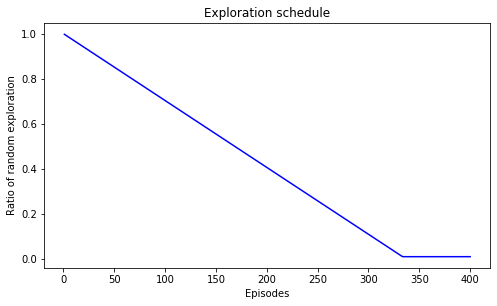

In [3]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "linear"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [4]:
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)

INTERSECTION 9: SETTING UP AGENT
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 24)           120         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 24)           600         dense[0][0]                      
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 24)           600         dense_1[0][0]                    
_____________________________________________________________

In [5]:
Balance_int_MultiDQN_Agents.prepopulate_memory()

Experience file not found. Generating now...
Working Directory set to: C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int10.inpx ...
Model File load process successful.
Simulation length set to 10801 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting S

In [6]:
Balance_int_MultiDQN_Agents.train(episodes)

Working Directory set to: C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int10.inpx ...
Model File load process successful.
Simulation length set to 10801 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: training
Starting Deployme

Train on 256 samples
256/256 - 0s - loss: 45.2745
Train on 256 samples
256/256 - 0s - loss: 57.7338
Train on 256 samples
256/256 - 0s - loss: 49.6200
Train on 256 samples
256/256 - 0s - loss: 54.3490
Train on 256 samples
256/256 - 0s - loss: 47.9202
Train on 256 samples
256/256 - 0s - loss: 62.2378
Train on 256 samples
256/256 - 0s - loss: 34.1488
Train on 256 samples
256/256 - 0s - loss: 50.8988
Train on 256 samples
256/256 - 0s - loss: 74.1797
Reducing exploration for all agents to 0.9672

Episode 12: Starting computation.
Random Seed Set to 54
Episode 12: Finished running.
Agent 0, Average Reward: -7.54
Train on 256 samples
256/256 - 0s - loss: 52.0517
Train on 256 samples
256/256 - 0s - loss: 64.3454
Train on 256 samples
256/256 - 0s - loss: 45.7324
Train on 256 samples
256/256 - 0s - loss: 45.1662
Train on 256 samples
256/256 - 0s - loss: 34.7410
Train on 256 samples
256/256 - 0s - loss: 62.1188
Train on 256 samples
256/256 - 0s - loss: 49.6918
Train on 256 samples
256/256 - 0s - 

Train on 256 samples
256/256 - 0s - loss: 54.7705
Train on 256 samples
256/256 - 0s - loss: 51.6827
Train on 256 samples
256/256 - 0s - loss: 55.0568
Train on 256 samples
256/256 - 0s - loss: 50.8335
Train on 256 samples
256/256 - 0s - loss: 49.3593
Train on 256 samples
256/256 - 0s - loss: 57.9457
Train on 256 samples
256/256 - 0s - loss: 46.4628
Train on 256 samples
256/256 - 0s - loss: 56.0785
Train on 256 samples
256/256 - 0s - loss: 49.4506
Reducing exploration for all agents to 0.9315

Episode 24: Starting computation.
Random Seed Set to 66
Episode 24: Finished running.
Agent 0, Average Reward: -5.53
Train on 256 samples
256/256 - 0s - loss: 67.2013
Train on 256 samples
256/256 - 0s - loss: 55.1264
Train on 256 samples
256/256 - 0s - loss: 43.3322
Train on 256 samples
256/256 - 0s - loss: 64.6680
Train on 256 samples
256/256 - 0s - loss: 68.3316
Train on 256 samples
256/256 - 0s - loss: 53.2170
Train on 256 samples
256/256 - 0s - loss: 63.3726
Train on 256 samples
256/256 - 0s - 

Train on 256 samples
256/256 - 0s - loss: 71.6239
Train on 256 samples
256/256 - 0s - loss: 50.2931
Train on 256 samples
256/256 - 0s - loss: 84.0539
Train on 256 samples
256/256 - 0s - loss: 63.1238
Train on 256 samples
256/256 - 0s - loss: 61.5777
Train on 256 samples
256/256 - 0s - loss: 73.3524
Reducing exploration for all agents to 0.8958

Episode 36: Starting computation.
Random Seed Set to 78
Episode 36: Finished running.
Agent 0, Average Reward: -5.72
Train on 256 samples
256/256 - 0s - loss: 53.6207
Train on 256 samples
256/256 - 0s - loss: 52.6523
Train on 256 samples
256/256 - 0s - loss: 43.8497
Train on 256 samples
256/256 - 0s - loss: 48.1054
Train on 256 samples
256/256 - 0s - loss: 69.4977
Train on 256 samples
256/256 - 0s - loss: 52.0866
Train on 256 samples
256/256 - 0s - loss: 58.5015
Train on 256 samples
256/256 - 0s - loss: 62.9502
Train on 256 samples
256/256 - 0s - loss: 59.2278
Train on 256 samples
256/256 - 0s - loss: 71.3923
Reducing exploration for all agents 

Train on 256 samples
256/256 - 0s - loss: 43.8052
Train on 256 samples
256/256 - 0s - loss: 60.7139
Train on 256 samples
256/256 - 0s - loss: 63.9088
Train on 256 samples
256/256 - 0s - loss: 47.4847
Train on 256 samples
256/256 - 0s - loss: 75.4550
Train on 256 samples
256/256 - 0s - loss: 51.2865
Reducing exploration for all agents to 0.8601

Episode 48: Starting computation.
Random Seed Set to 90
Episode 48: Finished running.
Agent 0, Average Reward: -4.79
Train on 256 samples
256/256 - 0s - loss: 73.9291
Train on 256 samples
256/256 - 0s - loss: 53.2965
Train on 256 samples
256/256 - 0s - loss: 39.9821
Train on 256 samples
256/256 - 0s - loss: 62.6268
Train on 256 samples
256/256 - 0s - loss: 75.4119
Train on 256 samples
256/256 - 0s - loss: 41.3841
Train on 256 samples
256/256 - 0s - loss: 54.5143
Train on 256 samples
256/256 - 0s - loss: 61.6092
Train on 256 samples
256/256 - 0s - loss: 60.4515
Train on 256 samples
256/256 - 0s - loss: 57.9287
Reducing exploration for all agents 

Train on 256 samples
256/256 - 0s - loss: 61.4108
Train on 256 samples
256/256 - 0s - loss: 54.4280
Train on 256 samples
256/256 - 0s - loss: 53.8790
Reducing exploration for all agents to 0.8243

Episode 60: Starting computation.
Random Seed Set to 102
Episode 60: Finished running.
Agent 0, Average Reward: -4.28
Train on 256 samples
256/256 - 0s - loss: 62.7354
Train on 256 samples
256/256 - 0s - loss: 79.6476
Train on 256 samples
256/256 - 0s - loss: 55.5315
Train on 256 samples
256/256 - 0s - loss: 46.2885
Train on 256 samples
256/256 - 0s - loss: 40.7356
Train on 256 samples
256/256 - 0s - loss: 34.5050
Train on 256 samples
256/256 - 0s - loss: 65.7303
Train on 256 samples
256/256 - 0s - loss: 44.8445
Train on 256 samples
256/256 - 0s - loss: 47.6244
Train on 256 samples
256/256 - 0s - loss: 43.6791
Weights succesfully copied to Target model for Agent 9.
Saving architecture, weights and optimizer state for agent-9
Dumping agent-9 memory into pickle file
Dumping Training Results int

Train on 256 samples
256/256 - 0s - loss: 32.1202
Train on 256 samples
256/256 - 0s - loss: 39.1347
Train on 256 samples
256/256 - 0s - loss: 25.0881
Train on 256 samples
256/256 - 0s - loss: 47.4099
Train on 256 samples
256/256 - 0s - loss: 39.1340
Reducing exploration for all agents to 0.7886

Episode 72: Starting computation.
Random Seed Set to 114
Episode 72: Finished running.
Agent 0, Average Reward: -4.55
Train on 256 samples
256/256 - 0s - loss: 40.8543
Train on 256 samples
256/256 - 0s - loss: 49.3661
Train on 256 samples
256/256 - 0s - loss: 44.2305
Train on 256 samples
256/256 - 0s - loss: 46.0640
Train on 256 samples
256/256 - 0s - loss: 30.1883
Train on 256 samples
256/256 - 0s - loss: 41.8865
Train on 256 samples
256/256 - 0s - loss: 39.0810
Train on 256 samples
256/256 - 0s - loss: 46.7515
Train on 256 samples
256/256 - 0s - loss: 29.4461
Train on 256 samples
256/256 - 0s - loss: 42.7998
Reducing exploration for all agents to 0.7856

Episode 73: Starting computation.
Rand

Train on 256 samples
256/256 - 0s - loss: 30.0967
Train on 256 samples
256/256 - 0s - loss: 28.3623
Train on 256 samples
256/256 - 0s - loss: 42.4569
Train on 256 samples
256/256 - 0s - loss: 28.5648
Train on 256 samples
256/256 - 0s - loss: 35.1484
Reducing exploration for all agents to 0.7529

Episode 84: Starting computation.
Random Seed Set to 126
Episode 84: Finished running.
Agent 0, Average Reward: -4.27
Train on 256 samples
256/256 - 0s - loss: 40.4300
Train on 256 samples
256/256 - 0s - loss: 30.2421
Train on 256 samples
256/256 - 0s - loss: 34.3820
Train on 256 samples
256/256 - 0s - loss: 35.9976
Train on 256 samples
256/256 - 0s - loss: 26.2890
Train on 256 samples
256/256 - 0s - loss: 32.8414
Train on 256 samples
256/256 - 0s - loss: 36.2388
Train on 256 samples
256/256 - 0s - loss: 40.9482
Train on 256 samples
256/256 - 0s - loss: 37.6347
Train on 256 samples
256/256 - 0s - loss: 38.7459
Reducing exploration for all agents to 0.7499

Episode 85: Starting computation.
Rand

Train on 256 samples
256/256 - 0s - loss: 27.2083
Reducing exploration for all agents to 0.7171

Episode 96: Starting computation.
Random Seed Set to 138
Episode 96: Finished running.
Agent 0, Average Reward: -4.46
Train on 256 samples
256/256 - 0s - loss: 30.2006
Train on 256 samples
256/256 - 0s - loss: 31.8796
Train on 256 samples
256/256 - 0s - loss: 38.0685
Train on 256 samples
256/256 - 0s - loss: 32.6387
Train on 256 samples
256/256 - 0s - loss: 22.5233
Train on 256 samples
256/256 - 0s - loss: 24.5821
Train on 256 samples
256/256 - 0s - loss: 34.3026
Train on 256 samples
256/256 - 0s - loss: 41.9970
Train on 256 samples
256/256 - 0s - loss: 29.5275
Train on 256 samples
256/256 - 0s - loss: 30.0699
Reducing exploration for all agents to 0.7142

Episode 97: Starting computation.
Random Seed Set to 139
Episode 97: Finished running.
Agent 0, Average Reward: -4.56
Train on 256 samples
256/256 - 0s - loss: 34.7633
Train on 256 samples
256/256 - 0s - loss: 50.3057
Train on 256 samples

Train on 256 samples
256/256 - 0s - loss: 33.3531
Train on 256 samples
256/256 - 0s - loss: 34.2603
Reducing exploration for all agents to 0.6814

Episode 108: Starting computation.
Random Seed Set to 150
Episode 108: Finished running.
Agent 0, Average Reward: -3.86
Train on 256 samples
256/256 - 0s - loss: 33.4903
Train on 256 samples
256/256 - 0s - loss: 40.2588
Train on 256 samples
256/256 - 0s - loss: 36.3337
Train on 256 samples
256/256 - 0s - loss: 46.8876
Train on 256 samples
256/256 - 0s - loss: 29.5430
Train on 256 samples
256/256 - 0s - loss: 43.2752
Train on 256 samples
256/256 - 0s - loss: 38.3399
Train on 256 samples
256/256 - 0s - loss: 35.7076
Train on 256 samples
256/256 - 0s - loss: 33.7238
Train on 256 samples
256/256 - 0s - loss: 29.8220
Reducing exploration for all agents to 0.6784

Episode 109: Starting computation.
Random Seed Set to 151
Episode 109: Finished running.
Agent 0, Average Reward: -5.1
Train on 256 samples
256/256 - 0s - loss: 44.9351
Train on 256 samp


Episode 120: Starting computation.
Random Seed Set to 162
Episode 120: Finished running.
Agent 0, Average Reward: -4.25
Train on 256 samples
256/256 - 0s - loss: 56.3205
Train on 256 samples
256/256 - 0s - loss: 38.8464
Train on 256 samples
256/256 - 0s - loss: 31.7495
Train on 256 samples
256/256 - 0s - loss: 42.4105
Train on 256 samples
256/256 - 0s - loss: 35.0001
Train on 256 samples
256/256 - 0s - loss: 52.9345
Train on 256 samples
256/256 - 0s - loss: 43.6548
Train on 256 samples
256/256 - 0s - loss: 41.0795
Train on 256 samples
256/256 - 0s - loss: 36.2311
Train on 256 samples
256/256 - 0s - loss: 38.4407
Weights succesfully copied to Target model for Agent 9.
Saving architecture, weights and optimizer state for agent-9
Dumping agent-9 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.6427

Episode 121: Starting computation.
Random Seed Set to 163
Episode 121: Finished running.
Agen

Train on 256 samples
256/256 - 0s - loss: 26.7529
Train on 256 samples
256/256 - 0s - loss: 21.4905
Train on 256 samples
256/256 - 0s - loss: 26.5916
Reducing exploration for all agents to 0.61

Episode 132: Starting computation.
Random Seed Set to 174
Episode 132: Finished running.
Agent 0, Average Reward: -4.08
Train on 256 samples
256/256 - 0s - loss: 34.8369
Train on 256 samples
256/256 - 0s - loss: 36.2805
Train on 256 samples
256/256 - 0s - loss: 26.0248
Train on 256 samples
256/256 - 0s - loss: 31.1064
Train on 256 samples
256/256 - 0s - loss: 24.5365
Train on 256 samples
256/256 - 0s - loss: 17.9153
Train on 256 samples
256/256 - 0s - loss: 49.2022
Train on 256 samples
256/256 - 0s - loss: 28.0599
Train on 256 samples
256/256 - 0s - loss: 23.4884
Train on 256 samples
256/256 - 0s - loss: 35.9583
Reducing exploration for all agents to 0.607

Episode 133: Starting computation.
Random Seed Set to 175
Episode 133: Finished running.
Agent 0, Average Reward: -4.1
Train on 256 samples

Train on 256 samples
256/256 - 0s - loss: 21.4785
Train on 256 samples
256/256 - 0s - loss: 26.5142
Train on 256 samples
256/256 - 0s - loss: 21.7824
Reducing exploration for all agents to 0.5742

Episode 144: Starting computation.
Random Seed Set to 186
Episode 144: Finished running.
Agent 0, Average Reward: -3.06
Train on 256 samples
256/256 - 0s - loss: 25.8152
Train on 256 samples
256/256 - 0s - loss: 36.9407
Train on 256 samples
256/256 - 0s - loss: 33.0888
Train on 256 samples
256/256 - 0s - loss: 17.2477
Train on 256 samples
256/256 - 0s - loss: 16.0774
Train on 256 samples
256/256 - 0s - loss: 22.3014
Train on 256 samples
256/256 - 0s - loss: 29.6447
Train on 256 samples
256/256 - 0s - loss: 29.9045
Train on 256 samples
256/256 - 0s - loss: 27.7381
Train on 256 samples
256/256 - 0s - loss: 32.2742
Reducing exploration for all agents to 0.5712

Episode 145: Starting computation.
Random Seed Set to 187
Episode 145: Finished running.
Agent 0, Average Reward: -3.42
Train on 256 sam

Train on 256 samples
256/256 - 0s - loss: 22.5278
Train on 256 samples
256/256 - 0s - loss: 22.9590
Train on 256 samples
256/256 - 0s - loss: 17.2138
Train on 256 samples
256/256 - 0s - loss: 14.1867
Reducing exploration for all agents to 0.5385

Episode 156: Starting computation.
Random Seed Set to 198
Episode 156: Finished running.
Agent 0, Average Reward: -2.93
Train on 256 samples
256/256 - 0s - loss: 14.1408
Train on 256 samples
256/256 - 0s - loss: 13.8226
Train on 256 samples
256/256 - 0s - loss: 12.6738
Train on 256 samples
256/256 - 0s - loss: 11.9773
Train on 256 samples
256/256 - 0s - loss: 11.0321
Train on 256 samples
256/256 - 0s - loss: 12.4049
Train on 256 samples
256/256 - 0s - loss: 19.0543
Train on 256 samples
256/256 - 0s - loss: 10.3667
Train on 256 samples
256/256 - 0s - loss: 8.3458
Train on 256 samples
256/256 - 0s - loss: 9.8686
Reducing exploration for all agents to 0.5355

Episode 157: Starting computation.
Random Seed Set to 199
Episode 157: Finished running.

Train on 256 samples
256/256 - 0s - loss: 19.7368
Train on 256 samples
256/256 - 0s - loss: 20.8783
Train on 256 samples
256/256 - 0s - loss: 19.3917
Train on 256 samples
256/256 - 0s - loss: 14.5220
Train on 256 samples
256/256 - 0s - loss: 16.6715
Reducing exploration for all agents to 0.5028

Episode 168: Starting computation.
Random Seed Set to 210
Episode 168: Finished running.
Agent 0, Average Reward: -2.38
Train on 256 samples
256/256 - 0s - loss: 17.9993
Train on 256 samples
256/256 - 0s - loss: 22.6817
Train on 256 samples
256/256 - 0s - loss: 16.9372
Train on 256 samples
256/256 - 0s - loss: 23.5861
Train on 256 samples
256/256 - 0s - loss: 22.5296
Train on 256 samples
256/256 - 0s - loss: 22.2629
Train on 256 samples
256/256 - 0s - loss: 12.5434
Train on 256 samples
256/256 - 0s - loss: 23.0500
Train on 256 samples
256/256 - 0s - loss: 19.1881
Train on 256 samples
256/256 - 0s - loss: 23.8283
Reducing exploration for all agents to 0.4998

Episode 169: Starting computation.
R

Train on 256 samples
256/256 - 0s - loss: 18.1996
Train on 256 samples
256/256 - 0s - loss: 18.6650
Reducing exploration for all agents to 0.467

Episode 180: Starting computation.
Random Seed Set to 222
Episode 180: Finished running.
Agent 0, Average Reward: -3.51
Train on 256 samples
256/256 - 0s - loss: 22.6341
Train on 256 samples
256/256 - 0s - loss: 20.1326
Train on 256 samples
256/256 - 0s - loss: 15.6050
Train on 256 samples
256/256 - 0s - loss: 24.1165
Train on 256 samples
256/256 - 0s - loss: 10.9101
Train on 256 samples
256/256 - 0s - loss: 26.1583
Train on 256 samples
256/256 - 0s - loss: 16.0304
Train on 256 samples
256/256 - 0s - loss: 21.3171
Train on 256 samples
256/256 - 0s - loss: 19.9203
Train on 256 samples
256/256 - 0s - loss: 22.2773
Weights succesfully copied to Target model for Agent 9.
Saving architecture, weights and optimizer state for agent-9
Dumping agent-9 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle f

Train on 256 samples
256/256 - 0s - loss: 21.0893
Train on 256 samples
256/256 - 0s - loss: 21.7064
Train on 256 samples
256/256 - 0s - loss: 13.2217
Train on 256 samples
256/256 - 0s - loss: 18.8239
Reducing exploration for all agents to 0.4313

Episode 192: Starting computation.
Random Seed Set to 234
Episode 192: Finished running.
Agent 0, Average Reward: -2.94
Train on 256 samples
256/256 - 0s - loss: 17.3544
Train on 256 samples
256/256 - 0s - loss: 17.9871
Train on 256 samples
256/256 - 0s - loss: 21.0445
Train on 256 samples
256/256 - 0s - loss: 29.3141
Train on 256 samples
256/256 - 0s - loss: 16.5815
Train on 256 samples
256/256 - 0s - loss: 21.1987
Train on 256 samples
256/256 - 0s - loss: 25.7838
Train on 256 samples
256/256 - 0s - loss: 21.6312
Train on 256 samples
256/256 - 0s - loss: 18.5264
Train on 256 samples
256/256 - 0s - loss: 20.4770
Reducing exploration for all agents to 0.4283

Episode 193: Starting computation.
Random Seed Set to 235
Episode 193: Finished runnin

Train on 256 samples
256/256 - 0s - loss: 17.0602
Train on 256 samples
256/256 - 0s - loss: 18.6734
Train on 256 samples
256/256 - 0s - loss: 24.1075
Train on 256 samples
256/256 - 0s - loss: 30.1695
Reducing exploration for all agents to 0.3956

Episode 204: Starting computation.
Random Seed Set to 246
Episode 204: Finished running.
Agent 0, Average Reward: -3.16
Train on 256 samples
256/256 - 0s - loss: 25.4032
Train on 256 samples
256/256 - 0s - loss: 16.8548
Train on 256 samples
256/256 - 0s - loss: 15.0948
Train on 256 samples
256/256 - 0s - loss: 24.2280
Train on 256 samples
256/256 - 0s - loss: 21.5754
Train on 256 samples
256/256 - 0s - loss: 12.0090
Train on 256 samples
256/256 - 0s - loss: 20.2372
Train on 256 samples
256/256 - 0s - loss: 23.6814
Train on 256 samples
256/256 - 0s - loss: 25.8017
Train on 256 samples
256/256 - 0s - loss: 22.8172
Reducing exploration for all agents to 0.3926

Episode 205: Starting computation.
Random Seed Set to 247
Episode 205: Finished runnin

Train on 256 samples
256/256 - 0s - loss: 12.9135
Train on 256 samples
256/256 - 0s - loss: 8.6508
Train on 256 samples
256/256 - 0s - loss: 4.8541
Reducing exploration for all agents to 0.3598

Episode 216: Starting computation.
Random Seed Set to 258
Episode 216: Finished running.
Agent 0, Average Reward: -2.23
Train on 256 samples
256/256 - 0s - loss: 20.8225
Train on 256 samples
256/256 - 0s - loss: 12.1680
Train on 256 samples
256/256 - 0s - loss: 18.1490
Train on 256 samples
256/256 - 0s - loss: 15.3779
Train on 256 samples
256/256 - 0s - loss: 11.8599
Train on 256 samples
256/256 - 0s - loss: 10.7420
Train on 256 samples
256/256 - 0s - loss: 7.2854
Train on 256 samples
256/256 - 0s - loss: 24.5331
Train on 256 samples
256/256 - 0s - loss: 13.9921
Train on 256 samples
256/256 - 0s - loss: 11.2872
Reducing exploration for all agents to 0.3569

Episode 217: Starting computation.
Random Seed Set to 259
Episode 217: Finished running.
Agent 0, Average Reward: -2.1
Train on 256 samples

Train on 256 samples
256/256 - 0s - loss: 20.4715
Train on 256 samples
256/256 - 0s - loss: 10.3077
Train on 256 samples
256/256 - 0s - loss: 18.0449
Train on 256 samples
256/256 - 0s - loss: 16.3208
Reducing exploration for all agents to 0.3241

Episode 228: Starting computation.
Random Seed Set to 270
Episode 228: Finished running.
Agent 0, Average Reward: -2.89
Train on 256 samples
256/256 - 0s - loss: 25.1873
Train on 256 samples
256/256 - 0s - loss: 16.2267
Train on 256 samples
256/256 - 0s - loss: 16.2787
Train on 256 samples
256/256 - 0s - loss: 18.1402
Train on 256 samples
256/256 - 0s - loss: 18.7973
Train on 256 samples
256/256 - 0s - loss: 16.9963
Train on 256 samples
256/256 - 0s - loss: 20.8492
Train on 256 samples
256/256 - 0s - loss: 15.7095
Train on 256 samples
256/256 - 0s - loss: 13.0898
Train on 256 samples
256/256 - 0s - loss: 16.2951
Reducing exploration for all agents to 0.3211

Episode 229: Starting computation.
Random Seed Set to 271
Episode 229: Finished runnin

Train on 256 samples
256/256 - 0s - loss: 10.3359
Reducing exploration for all agents to 0.2884

Episode 240: Starting computation.
Random Seed Set to 282
Episode 240: Finished running.
Agent 0, Average Reward: -3.24
Train on 256 samples
256/256 - 0s - loss: 13.7723
Train on 256 samples
256/256 - 0s - loss: 29.4693
Train on 256 samples
256/256 - 0s - loss: 11.4615
Train on 256 samples
256/256 - 0s - loss: 18.2153
Train on 256 samples
256/256 - 0s - loss: 14.7313
Train on 256 samples
256/256 - 0s - loss: 12.7244
Train on 256 samples
256/256 - 0s - loss: 12.0116
Train on 256 samples
256/256 - 0s - loss: 18.6412
Train on 256 samples
256/256 - 0s - loss: 20.1802
Train on 256 samples
256/256 - 0s - loss: 10.2683
Weights succesfully copied to Target model for Agent 9.
Saving architecture, weights and optimizer state for agent-9
Dumping agent-9 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.285

Train on 256 samples
256/256 - 0s - loss: 5.6818
Train on 256 samples
256/256 - 0s - loss: 6.3342
Train on 256 samples
256/256 - 0s - loss: 5.6843
Train on 256 samples
256/256 - 0s - loss: 6.3807
Reducing exploration for all agents to 0.2527

Episode 252: Starting computation.
Random Seed Set to 294
Episode 252: Finished running.
Agent 0, Average Reward: -1.63
Train on 256 samples
256/256 - 0s - loss: 11.8792
Train on 256 samples
256/256 - 0s - loss: 5.0739
Train on 256 samples
256/256 - 0s - loss: 5.7629
Train on 256 samples
256/256 - 0s - loss: 10.5501
Train on 256 samples
256/256 - 0s - loss: 14.3730
Train on 256 samples
256/256 - 0s - loss: 6.2855
Train on 256 samples
256/256 - 0s - loss: 5.3735
Train on 256 samples
256/256 - 0s - loss: 6.5153
Train on 256 samples
256/256 - 0s - loss: 5.9344
Train on 256 samples
256/256 - 0s - loss: 9.0276
Reducing exploration for all agents to 0.2497

Episode 253: Starting computation.
Random Seed Set to 295
Episode 253: Finished running.
Agent 0,

Train on 256 samples
256/256 - 0s - loss: 5.0229
Train on 256 samples
256/256 - 0s - loss: 4.3357
Train on 256 samples
256/256 - 0s - loss: 4.7942
Reducing exploration for all agents to 0.2169

Episode 264: Starting computation.
Random Seed Set to 306
Episode 264: Finished running.
Agent 0, Average Reward: -3.0
Train on 256 samples
256/256 - 0s - loss: 4.2173
Train on 256 samples
256/256 - 0s - loss: 19.4022
Train on 256 samples
256/256 - 0s - loss: 4.9060
Train on 256 samples
256/256 - 0s - loss: 10.9319
Train on 256 samples
256/256 - 0s - loss: 8.4915
Train on 256 samples
256/256 - 0s - loss: 4.7440
Train on 256 samples
256/256 - 0s - loss: 8.0016
Train on 256 samples
256/256 - 0s - loss: 6.9153
Train on 256 samples
256/256 - 0s - loss: 17.0860
Train on 256 samples
256/256 - 0s - loss: 7.2044
Reducing exploration for all agents to 0.214

Episode 265: Starting computation.
Random Seed Set to 307
Episode 265: Finished running.
Agent 0, Average Reward: -2.96
Train on 256 samples
256/256

Random Seed Set to 318
Episode 276: Finished running.
Agent 0, Average Reward: -1.61
Train on 256 samples
256/256 - 0s - loss: 5.8372
Train on 256 samples
256/256 - 0s - loss: 7.9091
Train on 256 samples
256/256 - 0s - loss: 6.2141
Train on 256 samples
256/256 - 0s - loss: 4.4720
Train on 256 samples
256/256 - 0s - loss: 8.9220
Train on 256 samples
256/256 - 0s - loss: 4.7790
Train on 256 samples
256/256 - 0s - loss: 4.0651
Train on 256 samples
256/256 - 0s - loss: 3.3780
Train on 256 samples
256/256 - 0s - loss: 6.3885
Train on 256 samples
256/256 - 0s - loss: 6.9610
Reducing exploration for all agents to 0.1782

Episode 277: Starting computation.
Random Seed Set to 319
Episode 277: Finished running.
Agent 0, Average Reward: -1.97
Train on 256 samples
256/256 - 0s - loss: 7.2290
Train on 256 samples
256/256 - 0s - loss: 13.0534
Train on 256 samples
256/256 - 0s - loss: 3.2544
Train on 256 samples
256/256 - 0s - loss: 3.3433
Train on 256 samples
256/256 - 0s - loss: 4.9551
Train on 256


Episode 288: Starting computation.
Random Seed Set to 330
Episode 288: Finished running.
Agent 0, Average Reward: -2.69
Train on 256 samples
256/256 - 0s - loss: 4.6585
Train on 256 samples
256/256 - 0s - loss: 4.2728
Train on 256 samples
256/256 - 0s - loss: 6.7423
Train on 256 samples
256/256 - 0s - loss: 6.1926
Train on 256 samples
256/256 - 0s - loss: 11.4673
Train on 256 samples
256/256 - 0s - loss: 4.0135
Train on 256 samples
256/256 - 0s - loss: 12.5310
Train on 256 samples
256/256 - 0s - loss: 4.1774
Train on 256 samples
256/256 - 0s - loss: 6.6656
Train on 256 samples
256/256 - 0s - loss: 4.8109
Reducing exploration for all agents to 0.1425

Episode 289: Starting computation.
Random Seed Set to 331
Episode 289: Finished running.
Agent 0, Average Reward: -2.63
Train on 256 samples
256/256 - 0s - loss: 5.3214
Train on 256 samples
256/256 - 0s - loss: 8.6897
Train on 256 samples
256/256 - 0s - loss: 6.7188
Train on 256 samples
256/256 - 0s - loss: 6.6134
Train on 256 samples
256

Train on 256 samples
256/256 - 0s - loss: 22.9990
Train on 256 samples
256/256 - 0s - loss: 17.4126
Train on 256 samples
256/256 - 0s - loss: 18.6807
Train on 256 samples
256/256 - 0s - loss: 9.7073
Train on 256 samples
256/256 - 0s - loss: 8.7424
Train on 256 samples
256/256 - 0s - loss: 16.6857
Train on 256 samples
256/256 - 0s - loss: 17.0516
Train on 256 samples
256/256 - 0s - loss: 18.9545
Weights succesfully copied to Target model for Agent 9.
Saving architecture, weights and optimizer state for agent-9
Dumping agent-9 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.1068

Episode 301: Starting computation.
Random Seed Set to 343
Episode 301: Finished running.
Agent 0, Average Reward: -2.93
Train on 256 samples
256/256 - 0s - loss: 12.1573
Train on 256 samples
256/256 - 0s - loss: 18.0545
Train on 256 samples
256/256 - 0s - loss: 11.2132
Train on 256 samples
256/256 - 0s - loss: 14.1

Train on 256 samples
256/256 - 0s - loss: 23.8672
Train on 256 samples
256/256 - 0s - loss: 17.7228
Train on 256 samples
256/256 - 0s - loss: 6.5863
Train on 256 samples
256/256 - 0s - loss: 15.4861
Train on 256 samples
256/256 - 0s - loss: 8.1417
Train on 256 samples
256/256 - 0s - loss: 9.1501
Train on 256 samples
256/256 - 0s - loss: 9.8671
Train on 256 samples
256/256 - 0s - loss: 8.1575
Train on 256 samples
256/256 - 0s - loss: 12.0204
Reducing exploration for all agents to 0.071

Episode 313: Starting computation.
Random Seed Set to 355
Episode 313: Finished running.
Agent 0, Average Reward: -2.19
Train on 256 samples
256/256 - 0s - loss: 13.1347
Train on 256 samples
256/256 - 0s - loss: 15.5015
Train on 256 samples
256/256 - 0s - loss: 15.5391
Train on 256 samples
256/256 - 0s - loss: 6.5396
Train on 256 samples
256/256 - 0s - loss: 8.6348
Train on 256 samples
256/256 - 0s - loss: 10.7590
Train on 256 samples
256/256 - 0s - loss: 12.2711
Train on 256 samples
256/256 - 0s - loss:

Train on 256 samples
256/256 - 0s - loss: 9.8722
Train on 256 samples
256/256 - 0s - loss: 12.3357
Train on 256 samples
256/256 - 0s - loss: 10.3208
Train on 256 samples
256/256 - 0s - loss: 10.8683
Train on 256 samples
256/256 - 0s - loss: 8.1810
Train on 256 samples
256/256 - 0s - loss: 11.8198
Train on 256 samples
256/256 - 0s - loss: 9.1507
Train on 256 samples
256/256 - 0s - loss: 8.3187
Reducing exploration for all agents to 0.0353

Episode 325: Starting computation.
Random Seed Set to 367
Episode 325: Finished running.
Agent 0, Average Reward: -2.74
Train on 256 samples
256/256 - 0s - loss: 8.9493
Train on 256 samples
256/256 - 0s - loss: 6.4379
Train on 256 samples
256/256 - 0s - loss: 20.8938
Train on 256 samples
256/256 - 0s - loss: 17.7904
Train on 256 samples
256/256 - 0s - loss: 13.8570
Train on 256 samples
256/256 - 0s - loss: 13.1269
Train on 256 samples
256/256 - 0s - loss: 11.9682
Train on 256 samples
256/256 - 0s - loss: 6.1945
Train on 256 samples
256/256 - 0s - loss

Train on 256 samples
256/256 - 0s - loss: 9.6859
Train on 256 samples
256/256 - 0s - loss: 13.3436
Train on 256 samples
256/256 - 0s - loss: 11.6648
Train on 256 samples
256/256 - 0s - loss: 7.1863
Reducing exploration for all agents to 0.01

Episode 337: Starting computation.
Random Seed Set to 379
Episode 337: Finished running.
Agent 0, Average Reward: -2.53
Train on 256 samples
256/256 - 0s - loss: 9.0760
Train on 256 samples
256/256 - 0s - loss: 9.5717
Train on 256 samples
256/256 - 0s - loss: 12.0885
Train on 256 samples
256/256 - 0s - loss: 11.2502
Train on 256 samples
256/256 - 0s - loss: 11.6703
Train on 256 samples
256/256 - 0s - loss: 5.8868
Train on 256 samples
256/256 - 0s - loss: 12.8479
Train on 256 samples
256/256 - 0s - loss: 11.8859
Train on 256 samples
256/256 - 0s - loss: 9.2542
Train on 256 samples
256/256 - 0s - loss: 7.8916
Reducing exploration for all agents to 0.01

Episode 338: Starting computation.
Random Seed Set to 380
Episode 338: Finished running.
Agent 0,

Train on 256 samples
256/256 - 0s - loss: 10.6999
Train on 256 samples
256/256 - 0s - loss: 7.8432
Train on 256 samples
256/256 - 0s - loss: 10.6151
Reducing exploration for all agents to 0.01

Episode 349: Starting computation.
Random Seed Set to 391
Episode 349: Finished running.
Agent 0, Average Reward: -2.71
Train on 256 samples
256/256 - 0s - loss: 13.5585
Train on 256 samples
256/256 - 0s - loss: 8.1140
Train on 256 samples
256/256 - 0s - loss: 10.9265
Train on 256 samples
256/256 - 0s - loss: 15.3797
Train on 256 samples
256/256 - 0s - loss: 8.8196
Train on 256 samples
256/256 - 0s - loss: 14.1438
Train on 256 samples
256/256 - 0s - loss: 8.3424
Train on 256 samples
256/256 - 0s - loss: 16.1792
Train on 256 samples
256/256 - 0s - loss: 11.5718
Train on 256 samples
256/256 - 0s - loss: 8.5063
Reducing exploration for all agents to 0.01

Episode 350: Starting computation.
Random Seed Set to 392
Episode 350: Finished running.
Agent 0, Average Reward: -2.49
Train on 256 samples
256/

Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.01

Episode 361: Starting computation.
Random Seed Set to 403
Episode 361: Finished running.
Agent 0, Average Reward: -2.7
Train on 256 samples
256/256 - 0s - loss: 11.9826
Train on 256 samples
256/256 - 0s - loss: 16.3020
Train on 256 samples
256/256 - 0s - loss: 13.5428
Train on 256 samples
256/256 - 0s - loss: 13.1665
Train on 256 samples
256/256 - 0s - loss: 19.8257
Train on 256 samples
256/256 - 0s - loss: 15.0760
Train on 256 samples
256/256 - 0s - loss: 27.1792
Train on 256 samples
256/256 - 0s - loss: 16.3325
Train on 256 samples
256/256 - 0s - loss: 17.0241
Train on 256 samples
256/256 - 0s - loss: 14.9889
Reducing exploration for all agents to 0.01

Episode 362: Starting computation.
Random Seed Set to 404
Episode 362: Finished running.
Agent 0, Average Reward: -2.74
Train on 256 samples
256/256 - 0s - loss: 9.3153
Train on 256 samples
256/256 - 0s - loss

Episode 373: Finished running.
Agent 0, Average Reward: -2.36
Train on 256 samples
256/256 - 0s - loss: 16.4219
Train on 256 samples
256/256 - 0s - loss: 14.5702
Train on 256 samples
256/256 - 0s - loss: 16.0123
Train on 256 samples
256/256 - 0s - loss: 8.6616
Train on 256 samples
256/256 - 0s - loss: 10.5550
Train on 256 samples
256/256 - 0s - loss: 10.9103
Train on 256 samples
256/256 - 0s - loss: 9.4419
Train on 256 samples
256/256 - 0s - loss: 14.0520
Train on 256 samples
256/256 - 0s - loss: 10.8867
Train on 256 samples
256/256 - 0s - loss: 10.7187
Reducing exploration for all agents to 0.01

Episode 374: Starting computation.
Random Seed Set to 416
Episode 374: Finished running.
Agent 0, Average Reward: -2.23
Train on 256 samples
256/256 - 0s - loss: 8.2663
Train on 256 samples
256/256 - 0s - loss: 10.3819
Train on 256 samples
256/256 - 0s - loss: 7.9372
Train on 256 samples
256/256 - 0s - loss: 8.6401
Train on 256 samples
256/256 - 0s - loss: 10.6044
Train on 256 samples
256/256

Train on 256 samples
256/256 - 0s - loss: 10.4710
Train on 256 samples
256/256 - 0s - loss: 14.4504
Train on 256 samples
256/256 - 0s - loss: 9.4997
Train on 256 samples
256/256 - 0s - loss: 9.3731
Train on 256 samples
256/256 - 0s - loss: 13.3151
Train on 256 samples
256/256 - 0s - loss: 13.3690
Train on 256 samples
256/256 - 0s - loss: 14.7669
Train on 256 samples
256/256 - 0s - loss: 12.3839
Train on 256 samples
256/256 - 0s - loss: 16.0271
Reducing exploration for all agents to 0.01

Episode 386: Starting computation.
Random Seed Set to 428
Episode 386: Finished running.
Agent 0, Average Reward: -2.63
Train on 256 samples
256/256 - 0s - loss: 14.2893
Train on 256 samples
256/256 - 0s - loss: 16.9407
Train on 256 samples
256/256 - 0s - loss: 10.3444
Train on 256 samples
256/256 - 0s - loss: 15.7794
Train on 256 samples
256/256 - 0s - loss: 11.9365
Train on 256 samples
256/256 - 0s - loss: 14.1102
Train on 256 samples
256/256 - 0s - loss: 17.3099
Train on 256 samples
256/256 - 0s - l

256/256 - 0s - loss: 12.1363
Train on 256 samples
256/256 - 0s - loss: 10.1507
Train on 256 samples
256/256 - 0s - loss: 11.5741
Train on 256 samples
256/256 - 0s - loss: 9.1459
Train on 256 samples
256/256 - 0s - loss: 12.8102
Reducing exploration for all agents to 0.01

Episode 398: Starting computation.
Random Seed Set to 440
Episode 398: Finished running.
Agent 0, Average Reward: -2.72
Train on 256 samples
256/256 - 0s - loss: 15.1333
Train on 256 samples
256/256 - 0s - loss: 11.5845
Train on 256 samples
256/256 - 0s - loss: 6.5926
Train on 256 samples
256/256 - 0s - loss: 12.6066
Train on 256 samples
256/256 - 0s - loss: 5.8980
Train on 256 samples
256/256 - 0s - loss: 5.8295
Train on 256 samples
256/256 - 0s - loss: 29.8922
Train on 256 samples
256/256 - 0s - loss: 20.9383
Train on 256 samples
256/256 - 0s - loss: 15.5791
Train on 256 samples
256/256 - 0s - loss: 14.1474
Reducing exploration for all agents to 0.01

Episode 399: Starting computation.
Random Seed Set to 441
Episode

In [7]:
Balance_int_MultiDQN_Agents.save(episodes)

Saving architecture, weights and optimizer state for agent-9
Dumping agent-9 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.


In [ ]:
Balance_int_MultiDQN_Agents.demo()

Intersection 10
Agent 10: Training Loss and Average Reward during training successfuly saved to file:
C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int10\Agents_Results\DuelingDDQN\Balance_int10_all_actions_400_10800_DuelingDDQN_Queues/Agent10_Loss_average_reward.json


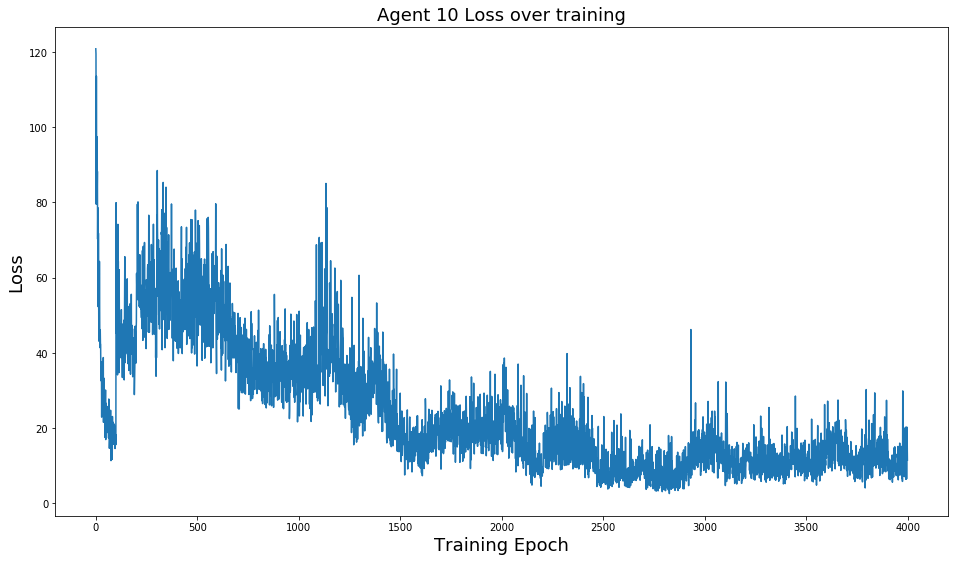

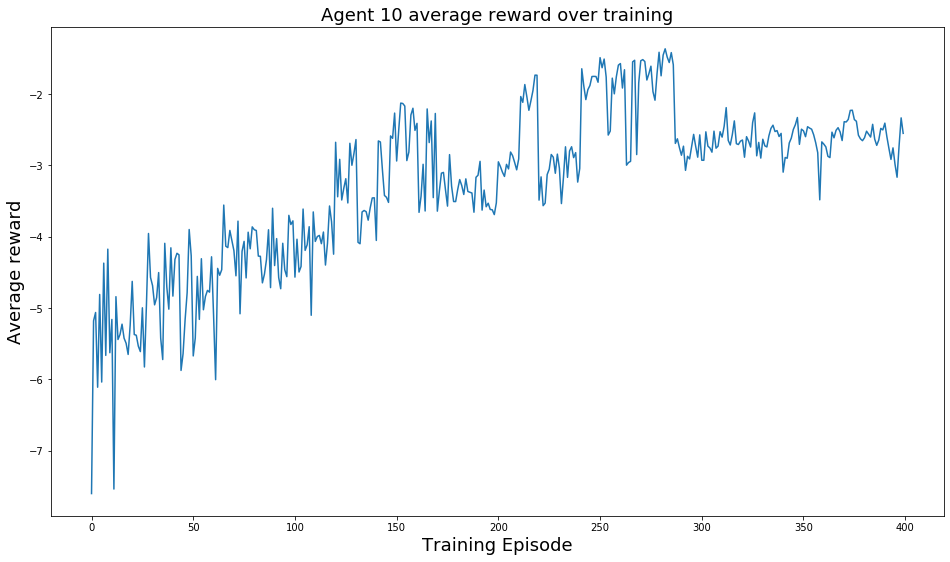

In [8]:
## AGENT TRAINING RESULTS
# Path to results folder
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)

# Loop over each agent
for idx , agent in Balance_int_MultiDQN_Agents.Agents.items():
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    print("Intersection "+str(intersection_number_in_vissim))
    
    ## SAVE TRAINING DATA TO JSON.
    json_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    Loss_reward = dict()   
    # Loss dictionary
    for epoch, loss in enumerate(agent.loss):
        loss_dict = { epoch : loss }
    Loss_reward['Agent{} loss'.format(intersection_number_in_vissim)] = loss_dict
    # Reward dictionary            
    episode = [i for i in range(len(agent.reward_storage))]
    Loss_reward['Agent{} Average_Reward'.format(intersection_number_in_vissim)] = agent.reward_storage
    # Store as JSON
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Loss_reward, f)
    print("Agent {}: Training Loss and Average Reward during training successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ## LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    ## TRAINING PLOTS
    loss_plot_filename  = "Agent{}_Loss.png".format(intersection_number_in_vissim)
    reward_plot_filename  = "Agent{}_average_reward.png".format(intersection_number_in_vissim) 
    
    ## Loss Plot
    plt.figure('LossAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.loss)
    #plt.yscale('log')

    plt.xlabel('Training Epoch',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent {} Loss over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + loss_plot_filename)

    ## Average Reward Plot
    plt.figure('RewardAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Training Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent {} average reward over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + reward_plot_filename)
    

In [ ]:
Balance_int_MultiDQN_Agents.load(400, best = True)

In [ ]:
Balance_int_MultiDQN_Agents.demo()

In [ ]:
Balance_int_MultiDQN_Agents.test()

In [ ]:
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

########################################
## Queues over time for each junction ##
########################################
for idx, queues in Balance_int_MultiDQN_Agents.Episode_Queues.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    
    queues = np.array(queues)
    queues = queues.T
    number_queues = np.size(queues,0)
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queues = dict()
    Queues['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queues[str(i)] = queue.tolist()
        Queues_legend.append("Queue"+str(i))
    
    ## Plot the queues
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    filename = "Junction{}_Queues.png".format(intersection_number_in_vissim)           
    plt.savefig(results_path + "/" + filename)
    
    # Store as JSON
    json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Queues, f)
        
    ### LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
        
    # Success Message
    print("Agent {}: Queues during Test successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
       
        
###################################################        
## Accumulated delay over time for each junction ##
###################################################
for idx, delay in Balance_int_MultiDQN_Agents.Cumulative_Episode_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1

    # Extract and process delay data
    Delay = dict()   
    Delay['Time'] = time
    Delay['Junction {} delay'.format(intersection_number_in_vissim)] = delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Delay, f)
        
    # Success Message
    print("Agent {}: Test Cumulative Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the cumulative delay
    plt.figure('2'+str(idx),figsize=(16, 9))
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    filename = "Junction{}_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)
    
    
    
########################################################    
## Accumulated stop delay over time for each junction ##
########################################################
for idx, stop_delay in Balance_int_MultiDQN_Agents.Cumulative_Episode_stop_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1    
    
    # Extract and process stop delay data
    Stop_delay = dict()   
    Stop_delay['Time'] = time
    Stop_delay['Junction {} stop delay'.format(intersection_number_in_vissim)] = stop_delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Stop Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    # Plot the cumulative stop delay
    plt.figure('3'+str(idx),figsize=(16, 9))
    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    filename = "Junction{}_Cumulative_Stop_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)

    
    
###############################################
## ONLY IF THERE IS MORE THAN ONE CONTROLLER ##
##    These are the global network plots     ##
###############################################

if len(Balance_int_MultiDQN_Agents.Agents) > 1:
    ########################################    
    ## Global Accumulated delay over time ##
    ########################################
    
    # Process global delay data
    Global_delay = dict()   
    Global_delay['Time'] = time
    Global_delay['Global accumulated Delay'] = Balance_int_MultiDQN_Agents.Cumulative_Totale_network_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    
    # Plot the global delay
    plt.figure('4',figsize=(16,9))
    plt.plot(Cumulative_Totale_network_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated Delay',fontsize=18)
    plt.title('Global accumulated Delay',fontsize=18)
    plt.gca().legend('Global accumulated delay')

    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)


    #############################################
    ## Global Accumulated stop delay over time ##
    #############################################
    
    # Process global stop delay data
    Global_stop_delay = dict()   
    Global_stop_delay['Time'] = time
    Global_stop_delay['Global accumulated stop Delay'] = Balance_int_MultiDQN_Agents.Cumulative_Totale_network_stop_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Stop_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Stop Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Stop_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the global stop delay
    plt.figure('5'+str(idx),figsize=(16, 9))
    plt.plot(Cumulative_Totale_network_stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated stop Delay',fontsize=18)
    plt.title('Global accumulated stop Delay',fontsize=18)
    plt.gca().legend('Global accumulated stop Delay')
    
    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)



# Balance RL DQN

In [ ]:
map_name  = 'Balance'
model_name = map_name

vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 44
sim_length = 3601
timesteps_per_second = 1
agent_type = "DQN"
actions = 'default_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [ ]:
Balance_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)

In [ ]:
Balance_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Balance_MultiDQN_Agents.train(episodes)

In [ ]:
Balance_MultiDQN_Agents.save(500)

In [ ]:
Balance_MultiDQN_Agents.demo()

In [ ]:
# For the agent training
ploty = 1
for idx , agent in Balance_MultiDQN_Agents.Agents.items():
    print("Agent "+str(idx))
    #print(ploty)
    #plt.subplot(14, 2, ploty)

    plt.figure('6'+str(idx),figsize=(4.5, 3))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", \
                        "Agent{}_Loss.png".format(idx)) 
    #plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "DQN", \
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    ploty+=1
    #print(ploty)

    
    #plt.subplot(14, 2, ploty)
    plt.figure('7'+str(idx),figsize=(4.5, 3))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    #plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    #Loss_rewarddf.to_csv(csv_Path,index=False)
    ploty+=1
    

In [ ]:
Balance_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Balance_MultiDQN_Agents.Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Balance_MultiDQN_Agents.Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Balance_MultiDQN_Agents.Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Balance_MultiDQN_Agents.Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Balance_MultiDQN_Agents.Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Balance_MultiDQN_Agents.load(498, best = True)

In [ ]:
Balance_MultiDQN_Agents.demo()

# Single_Cross_Straight AC

---> The lack of speed comes from the size of the model (particularly the change of color of the heads). 

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Straigth_AC"



# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

In [ ]:
gamma = 0.95
alpha = 0.00001


value = 0.5
entropy = 0.5
n_step_size = 16
state_size = [5]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Straight_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.train(200) 

In [ ]:
Single_Cross_Straight_MultiAC_Agents.save(401)


In [ ]:
Single_Cross_Straight_MultiAC_Agents.load(200, best = True)
            
            
            
        
            

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Single_Cross_Straight_MultiAC_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiAC_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.Agents[0].Loss

In [ ]:
Single_Cross_Straight_MultiAC_Agents.demo()

# Single_Cross_Straight DQN

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "DuelingDQN"
Session_ID = "Single_Cross_Straigth_DuelingDQN20c0"

# all controller actions
# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4]  }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

## DQN Hyperaramenters
episodes = 300
copy_weights_frequency = 10

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.train(episodes)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.load(300 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Straight_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.demo()

# Single_Cross_Triple 4 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3600

agent_type = "AC"
Session_ID = "Single_Cross_TripleAC4test1"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         }
    },
   'demand' : {"default" : [400,400,400,400] }
}

In [ ]:
gamma = 0.85
alpha = 0.00005


value = 0.5
entropy = 5000
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple4_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.demo()

# Single_Cross_Triple 4 action DQN

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

Session_ID = "Single_Cross_Triple4_actions"
#Session_ID = "DQN"

agent_type = "DuelingDDQN"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{ 'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' :    {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
         
         'all_actions' :       {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         },
        },
     'demand' : { 'default' : [400, 400, 400, 400]}
                  
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 5

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.train(120)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.save()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.load(best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiDQN_Agents.test()

In [ ]:
# To be arranged for multy agents

queues = np.array(Episode_Queues[0])
queues = queues.T

delay = Cumulative_Episode_Delays[0]

# Plot the queues
plt.figure(1)
for queue in queues:
    plt.plot(queue)

# plot the junctions delays
plt.figure(2)
plt.plot(delay)

#plot the total delays 
plt.figure(3)
plt.plot(Cumulative_Totale_network_delay)

# Dont freak out the 2 delays are not the same because the node is not covering all the junction

"""
Because the cars never leave the nodes the delay is not computed correctly (when the agent doesn't work) 
"""



In [ ]:
plt.figure(4)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].loss)

plt.figure(5)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)
print(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.demo()

# Single_Cross_Triple 8 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Triple8_actions_AC10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [ ]:
gamma = 0.95
alpha = 0.000001


value = 5
entropy = 500
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple8_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple8_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.demo()

# Single_Cross_Triple 8 actions DQN

In [ ]:
model_name  = 'Single_Cross_Triple'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Single_Cross_Triple8_actions_DuelingDDQN20c10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400 
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.train(episodes) 

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.load(400,best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Triple8_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in Single_Cross_Triple8_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.demo()

# Five intersection DQN

In [ ]:
model_name  = 'Five_intersection'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Five5transfert"

# all controller actions
Five_intersection_dictionary =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['11-1', '11-2', '11-3', '12-1', '12-2', '12-3', '13-1', '13-2', '13-3', '14-1', '14-2', '14-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]
         },
                  1 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['21-1', '21-2', '21-3', '22-1', '22-2', '22-3', '23-1', '23-2', '23-3', '24-1', '24-2', '24-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
        'queues_counter_ID' : [13,14,15,16,17,18,19,20,21,22,23,24]
         },
                  2 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['31-1', '31-2', '31-3', '32-1', '32-2', '32-3', '33-1', '33-2', '33-3', '34-1', '34-2', '34-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [25,26,27,28,29,30,31,32,33,34,35,36]
         },
                  3 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['41-1', '41-2', '41-3', '42-1', '42-2', '42-3', '43-1', '43-2', '43-3', '44-1', '44-2', '44-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
          'queues_counter_ID' : [37,38,39,40,41,42,43,44,45,46,47,48]
         },
                  4 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['51-1', '51-2', '51-3', '52-1', '52-2', '52-3', '53-1', '53-2', '53-3', '54-1', '54-2', '54-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [49,50,51,52,53,54,55,56,57,58,59,60]
         }
    },
   'demand' : { 'default' : [400,400,400,400,400,400,400,400,400,400,400,400],
             
             0 : [200,200,200,200,200,200,200,200,200,200,200,200],
             1 : [400,400,400,400,400,400,400,400,400,400,400,400],
             2 : [500,900,500,500,900,500,500,900,500,500,900,500],
             3 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             4 : [500,700,500,500,700,500,500,700,500,500,700,500],
             5 : [500,700,500,500,700,500,500,700,500,500,700,500],
             6 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             7 : [500,900,500,500,900,500,500,900,500,500,900,500],
             8 : [400,400,400,400,400,400,400,400,400,400,400,400],
             9 : [200,200,200,200,200,200,200,200,200,200,200,200]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Five_intersection_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Five_intersection_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Five_intersection_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Five_intersection_MultiDQN_Agents.train(episodes)

In [ ]:
Five_intersection_MultiDQN_Agents.save(401)
Five_intersection_MultiDQN_Agents.load(400,best = True)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[0].load_agent(vissim_working_directory, 'Single_Cross_Triple', 'Single_Cross_Triple8_actions',400 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Five_intersection_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]


# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        
    plt.xlabel('Time [s]')
    plt.ylabel('Queue Length')
    plt.title('Junction {} Queue length'.format(idx))
    plt.gca().legend(('West Queue','South Queue', 'East Queue', 'North Queue'))
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Delay')
    plt.title('Junction {} Delay'.format(idx))
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Stop Delay')
    plt.title('Junction {} Stop Delay'.format(idx))
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated Delay')
plt.title('Global accumulated Delay')
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated stop Delay')
plt.title('Global accumulated stop Delay')
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[2] = Five_intersection_MultiDQN_Agents.Agents[3]

In [ ]:
Five_intersection_MultiDQN_Agents.demo()